In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [2]:
# Define the conversion rate from USD to GBP
USD_TO_GBP = 0.75

# Apply conversion to the salary_year_avg column
df['salary_year_avg_gbp'] = df['salary_year_avg'] * USD_TO_GBP

In [4]:
# Filter for the job titles and country
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [29]:
# Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

# Filter the df for the top 6 job titles
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

# Order the job titles by median salary
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg_gbp'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

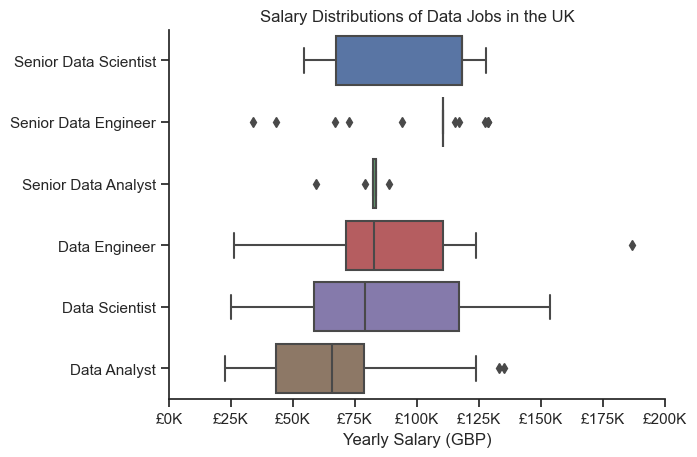

In [30]:
# Plot Salary Distributions
sns.boxplot(data=df_UK_top6, x='salary_year_avg_gbp', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the UK')
plt.xlabel('Yearly Salary (GBP)')
plt.ylabel('')
plt.xlim(0, 200000)  # Convert the x-axis limit to GBP
ticks_x = plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [33]:
# Investigate Median Salary Vs Skill for Data Analysts
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg_gbp'])

df_DA_UK = df_DA_UK.explode('job_skills')

In [35]:
# Determine The Highest Paid Skills and Most Demanded Skills
df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg_gbp'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,147187.50
bitbucket,3,141750.00
gitlab,3,139500.00
solidity,1,134250.00
hugging face,1,131250.00
couchbase,1,120386.25
ansible,1,119730.00
mxnet,2,111750.00
cassandra,6,111187.50


In [36]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg_gbp'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,73125.0000
tableau,1364,69656.2500
r,893,69375.0000
sql server,286,69375.0000
sql,2508,68250.0000
sas,926,67500.0000
power bi,838,67500.0000
powerpoint,462,63750.0000
excel,1808,63294.0000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


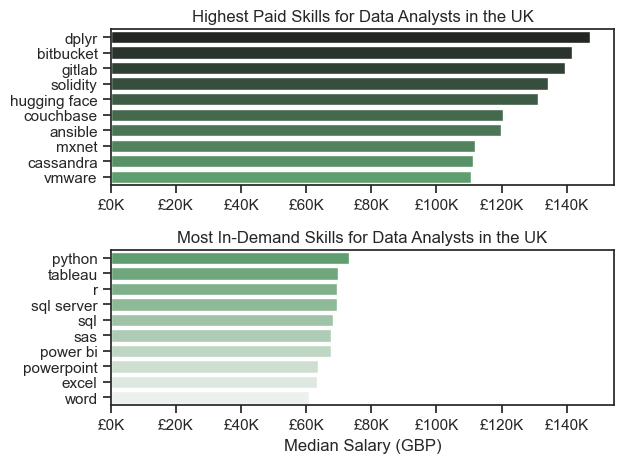

In [39]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], palette='dark:g')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in the UK')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], palette='light:g_r')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in the UK')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (GBP)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()